
=== Wine Dataset ===
KMeans Purity: 0.8371
DBSCAN Purity: 0.7640
Agglomerative Clustering Purity: 0.8596


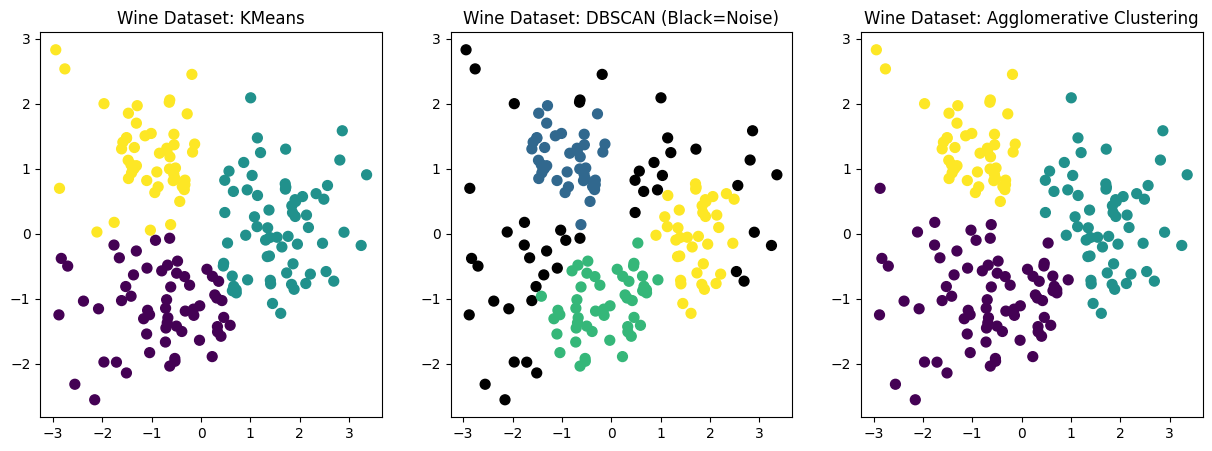


=== Iris Dataset ===
KMeans Purity: 0.8333
DBSCAN Purity: 0.6400
Agglomerative Clustering Purity: 0.8067


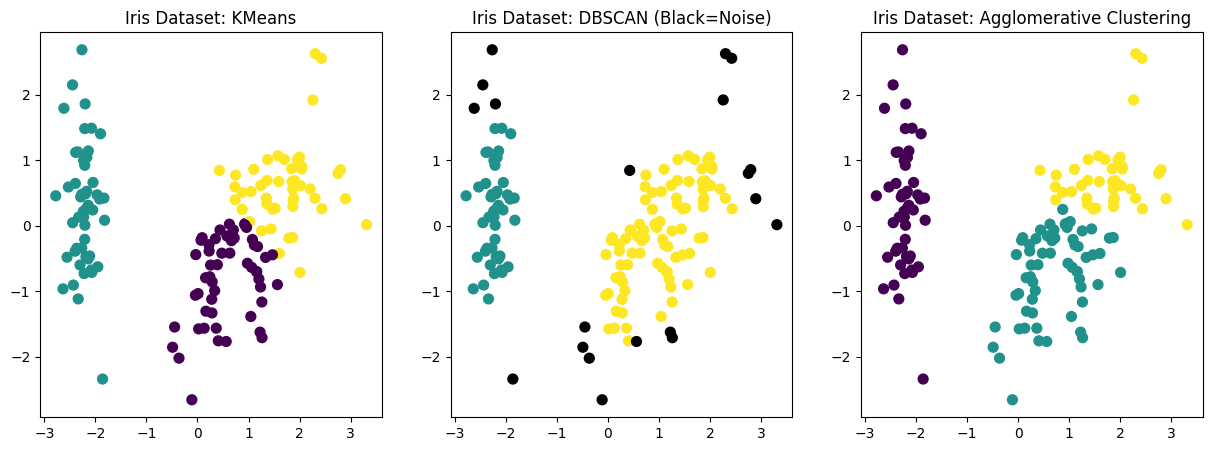

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, load_iris
from collections import Counter
from sklearn.decomposition import PCA

# Функция для вычисления purity
def purity_score(y_true, y_pred):
    cluster_labels = np.unique(y_pred)
    total_correct = 0
    for cluster in cluster_labels:
        labels, counts = np.unique(y_true[y_pred == cluster], return_counts=True)
        total_correct += np.max(counts) if counts.size > 0 else 0
    return total_correct / len(y_true)

# === Wine Dataset ===
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

wine_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'hue', 'proanthocyanins']
X_wine = wine_df[wine_features]
y_wine = wine_df['target']

scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

# === Iris Dataset ===
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

iris_features = iris_data.feature_names[:4]
X_iris = iris_df[iris_features]
y_iris = iris_df['target']

X_iris_scaled = scaler.fit_transform(X_iris)

pca = PCA(n_components=2)

X_wine_pca = pca.fit_transform(X_wine_scaled)
X_iris_pca = pca.fit_transform(X_iris_scaled)

# Функция кластеризации и оценки
def cluster_and_evaluate(X, y_true, dataset_name):
    print(f'\n=== {dataset_name} ===')

    # K-Means
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_purity = purity_score(y_true, kmeans_labels)
    print(f'KMeans Purity: {kmeans_purity:.4f}')

    # DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=10)
    dbscan_labels = dbscan.fit_predict(X)
    dbscan_purity = purity_score(y_true, dbscan_labels)
    print(f'DBSCAN Purity: {dbscan_purity:.4f}')

    # Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
    agglo_labels = agglo.fit_predict(X)
    agglo_purity = purity_score(y_true, agglo_labels)
    print(f'Agglomerative Clustering Purity: {agglo_purity:.4f}')

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
    axes[0].set_title(f'{dataset_name}: KMeans')
    unique_labels = np.unique(dbscan_labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: colors[i] for i, label in enumerate(unique_labels)}
    color_map[-1] = [0, 0, 0, 1]  # Черный цвет для шума

    dbscan_colors = [color_map[label] for label in dbscan_labels]
    axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_colors, s=50)
    axes[1].set_title(f'{dataset_name}: DBSCAN (Black=Noise)')

    axes[2].scatter(X[:, 0], X[:, 1], c=agglo_labels, cmap='viridis', s=50)
    axes[2].set_title(f'{dataset_name}: Agglomerative Clustering')

    plt.show()

# Запуск кластеризации для обоих датасетов
cluster_and_evaluate(X_wine_pca, y_wine, "Wine Dataset")
cluster_and_evaluate(X_iris_pca, y_iris, "Iris Dataset")



=== Blobs ===
KMeans Purity: 1.0000
DBSCAN Purity: 1.0000
Agglomerative Clustering Purity: 1.0000


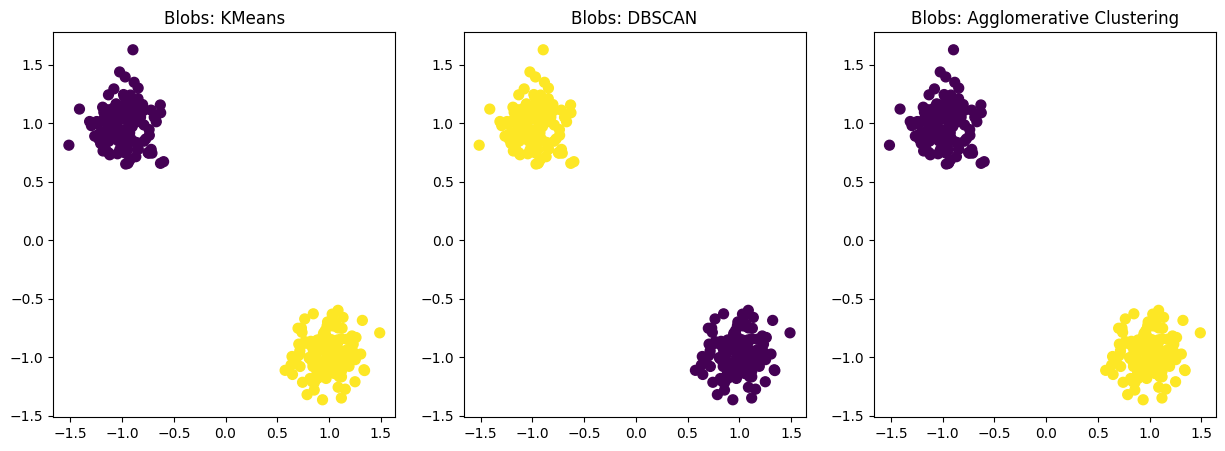


=== Moons ===
KMeans Purity: 0.8433
DBSCAN Purity: 1.0000
Agglomerative Clustering Purity: 0.8667


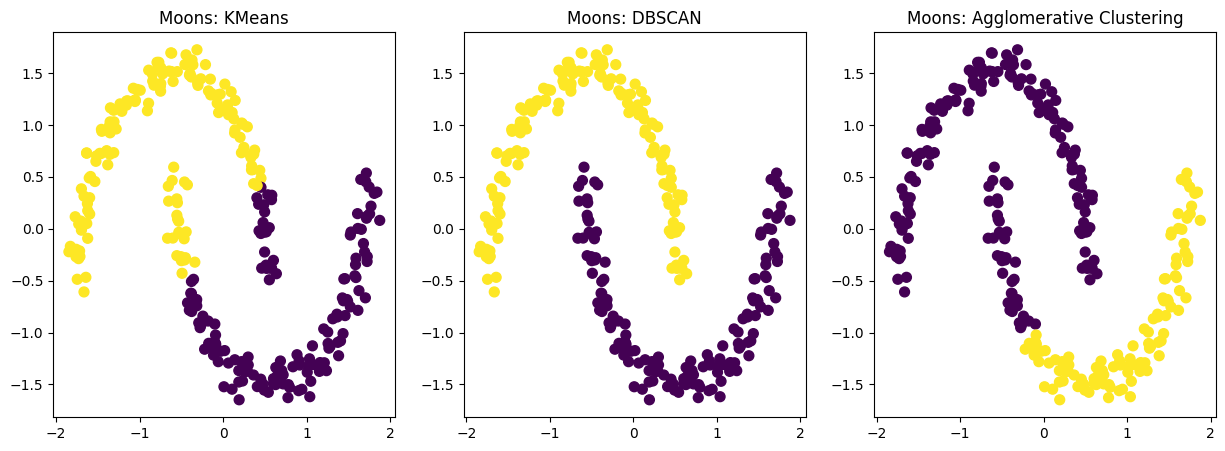


=== Circles ===
KMeans Purity: 0.5033
DBSCAN Purity: 1.0000
Agglomerative Clustering Purity: 0.5333


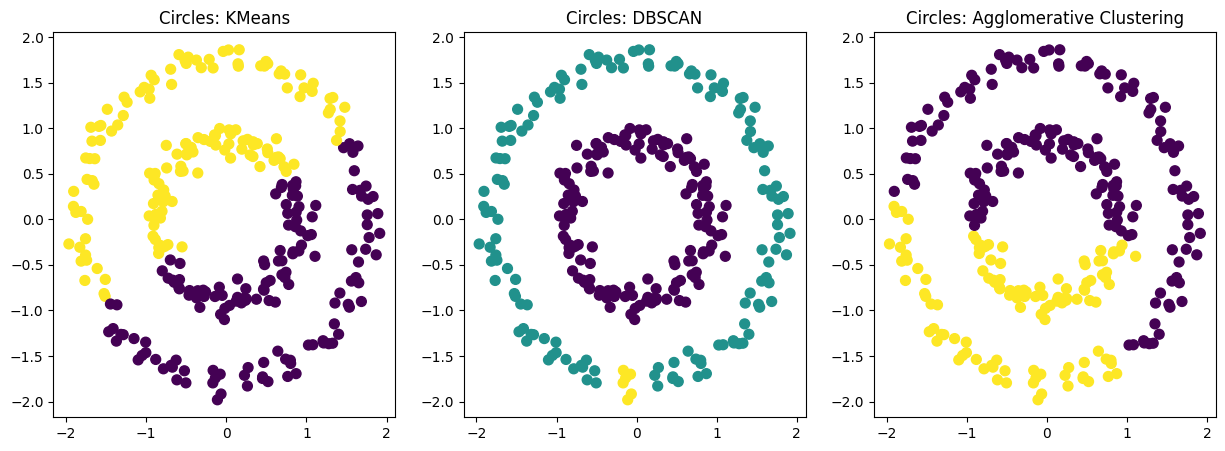


=== Noisy Data ===
KMeans Purity: 0.9000
DBSCAN Purity: 0.9933
Agglomerative Clustering Purity: 0.9000


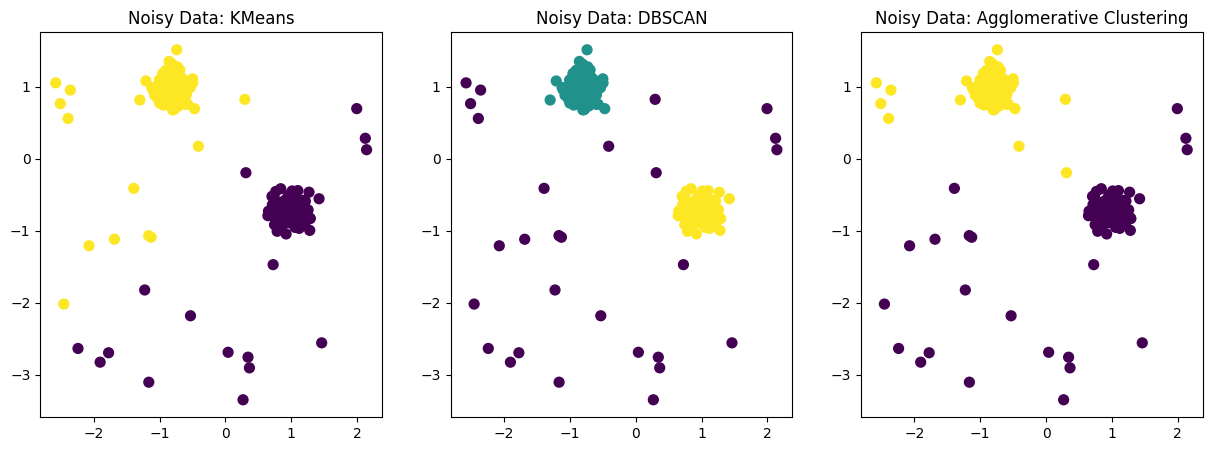

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles
from collections import Counter

# Функция для вычисления purity
def purity_score(y_true, y_pred):
    cluster_labels = np.unique(y_pred)
    total_correct = 0
    for cluster in cluster_labels:
        labels, counts = np.unique(y_true[y_pred == cluster], return_counts=True)
        total_correct += np.max(counts) if counts.size > 0 else 0
    return total_correct / len(y_true)

# Функция кластеризации и визуализации
def cluster_and_visualize(X, y_true, dataset_name):
    print(f'\n=== {dataset_name} ===')

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # K-Means
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_purity = purity_score(y_true, kmeans_labels)
    print(f'KMeans Purity: {kmeans_purity:.4f}')

    # DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    dbscan_purity = purity_score(y_true, dbscan_labels)
    print(f'DBSCAN Purity: {dbscan_purity:.4f}')

    # Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
    agglo_labels = agglo.fit_predict(X_scaled)
    agglo_purity = purity_score(y_true, agglo_labels)
    print(f'Agglomerative Clustering Purity: {agglo_purity:.4f}')

    # Визуализация
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
    axes[0].set_title(f'{dataset_name}: KMeans')

    axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
    axes[1].set_title(f'{dataset_name}: DBSCAN')

    axes[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', s=50)
    axes[2].set_title(f'{dataset_name}: Agglomerative Clustering')

    plt.show()


# ===  Четко разделенные кластеры ===
X_blobs, y_blobs = make_blobs(n_samples=300, centers=2, cluster_std=0.6, random_state=42)
cluster_and_visualize(X_blobs, y_blobs, "Blobs")

# ===  Кластеры сложной формы ===
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
cluster_and_visualize(X_moons, y_moons, "Moons")

X_circles, y_circles = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
cluster_and_visualize(X_circles, y_circles, "Circles")

# === Данные с шумом ===
X_noisy, y_noisy = make_blobs(n_samples=270, centers=2, cluster_std=0.6, random_state=42)

# Добавление случайных точек (шум)
np.random.seed(42)
outliers = np.random.uniform(low=-10, high=10, size=(30, 2))
X_noisy = np.vstack([X_noisy, outliers])
y_noisy = np.hstack([y_noisy, [-1] * len(outliers)])

cluster_and_visualize(X_noisy, y_noisy, "Noisy Data")


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, load_iris
from collections import Counter
from sklearn.decomposition import PCA

# Функция для вычисления purity
def purity_score(y_true, y_pred):
    cluster_labels = np.unique(y_pred)
    total_correct = 0
    for cluster in cluster_labels:
        labels, counts = np.unique(y_true[y_pred == cluster], return_counts=True)
        total_correct += np.max(counts) if counts.size > 0 else 0
    return total_correct / len(y_true)

# === Загрузка датасетов ===
datasets = {
    "Wine Dataset": load_wine(),
    "Iris Dataset": load_iris()
}

features = {
    "Wine Dataset": ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'hue', 'proanthocyanins'],
    "Iris Dataset": None
}

kmeans_params = {
    "n_clusters": [2, 3, 4, 5],
    "init": ["k-means++", "random"]
}

dbscan_params = {
    "eps": [0.5, 1.0, 1.5],
    "min_samples": [2, 5, 10]
}

agglo_params = {
    "n_clusters": [2, 3, 4, 5],
    "linkage": ["ward", "complete", "average"]
}

# Обработка датасетов
for dataset_name, dataset in datasets.items():
    print(f"\n=== {dataset_name} ===")

    # Загружаем данные
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target

    selected_features = features[dataset_name] if features[dataset_name] else dataset.feature_names
    X = df[selected_features]
    y_true = df['target']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    best_scores = {}

    # K-Means
    best_kmeans_purity, best_kmeans_params = 0, None
    for n_clusters, init in product(kmeans_params["n_clusters"], kmeans_params["init"]):
        kmeans = KMeans(n_clusters=n_clusters, init=init, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_pca)
        purity = purity_score(y_true, labels)
        if purity > best_kmeans_purity:
            best_kmeans_purity = purity
            best_kmeans_params = {"n_clusters": n_clusters, "init": init}
    best_scores["K-Means"] = (best_kmeans_purity, best_kmeans_params)

    # DBSCAN
    best_dbscan_purity, best_dbscan_params = 0, None
    for eps, min_samples in product(dbscan_params["eps"], dbscan_params["min_samples"]):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)
        purity = purity_score(y_true, labels)
        if purity > best_dbscan_purity:
            best_dbscan_purity = purity
            best_dbscan_params = {"eps": eps, "min_samples": min_samples}
    best_scores["DBSCAN"] = (best_dbscan_purity, best_dbscan_params)

    # Agglomerative Clustering
    best_agglo_purity, best_agglo_params = 0, None
    for n_clusters, linkage in product(agglo_params["n_clusters"], agglo_params["linkage"]):
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agglo.fit_predict(X_pca)
        purity = purity_score(y_true, labels)
        if purity > best_agglo_purity:
            best_agglo_purity = purity
            best_agglo_params = {"n_clusters": n_clusters, "linkage": linkage}
    best_scores["Agglomerative Clustering"] = (best_agglo_purity, best_agglo_params)

    for method, (purity, params) in best_scores.items():
        print(f"{method}: Лучший Purity = {purity:.4f}, параметры = {params}")





=== Wine Dataset ===
K-Means: Лучший Purity = 0.8764, параметры = {'n_clusters': 4, 'init': 'k-means++'}
DBSCAN: Лучший Purity = 0.7640, параметры = {'eps': 0.5, 'min_samples': 10}
Agglomerative Clustering: Лучший Purity = 0.8596, параметры = {'n_clusters': 3, 'linkage': 'ward'}

=== Iris Dataset ===
K-Means: Лучший Purity = 0.8600, параметры = {'n_clusters': 5, 'init': 'random'}
DBSCAN: Лучший Purity = 0.6800, параметры = {'eps': 0.5, 'min_samples': 5}
Agglomerative Clustering: Лучший Purity = 0.8467, параметры = {'n_clusters': 4, 'linkage': 'average'}
